In [1]:
import sys
sys.path.append('/efs_ecco/ECCO/EMU/emu_userinterface_dir/')
import emu_plot_arg_py as ept
import numpy as np
import matplotlib.pyplot as plt
import lib_python
import plot_conv
import plot_conv_sub

# set up the plotting routine

In [ ]:
import ecco_v4_py as e4p

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
projection = ccrs.PlateCarree()
grid = xr.open_dataset('/efs_ecco/wjiang/data_folder/GRID_GEOMETRY_ECCO_V4r4_native_llc0090.nc')
xx = np.array(grid.XC).ravel()
yy = np.array(grid.YC).ravel()
cmap = 'Blues'
extent = (-70,40,-30,30)

# Load forward tracer data

Tracer is released from 6 degree S, and forward for a year. 

In [3]:
globals_dict = ept.emu_plot(run_name="/efs_ecco/wjiang/emu_runs/trac_drift/emu_trc_561_926_trc3d.-40.0_30.0_-7.0_-5.0_25.0_0.0",
                            avg_type='m',
                            pfile_beg=0, pfile_end=1000000)

Found file: /efs_ecco/ECCO/EMU/emu_userinterface_dir/emu_env.singularity
EMU Input Files directory: /efs/owang/ECCO/EMU_test/emu_input_dir

Specified directory of EMU run to examine: /efs_ecco/wjiang/emu_runs/trac_drift/emu_trc_561_926_trc3d.-40.0_30.0_-7.0_-5.0_25.0_0.0

Reading /efs_ecco/wjiang/emu_runs/trac_drift/emu_trc_561_926_trc3d.-40.0_30.0_-7.0_-5.0_25.0_0.0

Reading Tracer Tool output ... 

Detected     13 files of ptracer_mon_mean.*.data
Detected     12 files of ptracer_mon_snap.*.data

Averaging type ("m" for monthly or "s" for snapshot): m

==> Reading and plotting monthly means ... 
Specified start and end files #: 0 and 1000000


Reading file ... /efs_ecco/wjiang/emu_runs/trac_drift/emu_trc_561_926_trc3d.-40.0_30.0_-7.0_-5.0_25.0_0.0/output/ptracer_mon_mean.0000013908.data

Reading file ... /efs_ecco/wjiang/emu_runs/trac_drift/emu_trc_561_926_trc3d.-40.0_30.0_-7.0_-5.0_25.0_0.0/output/ptracer_mon_mean.0000014640.data

Reading file ... /efs_ecco/wjiang/emu_runs/trac_drift

In [10]:
trc = e4p.llc_compact_to_tiles(globals_dict['return_vars']['trc'])

llc_compact_to_faces: dims, llc  (13, 50, 1170, 90) 90
llc_compact_to_faces: data_compact array type  float32
llc_faces_to_tiles: data_tiles shape  (13, 50, 13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  float32


# Here is the plot

/srv/conda/envs/notebook/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1768: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)
/srv/conda/envs/notebook/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1768: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)
/srv/conda/envs/notebook/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1768: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorr

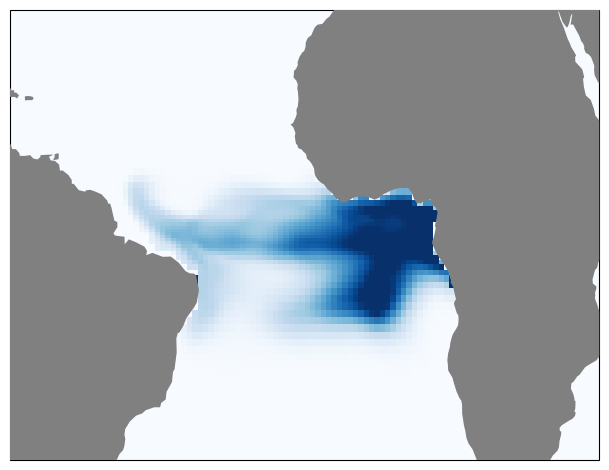

In [39]:
plt.clf()
ax = plt.axes(projection = projection)
vmax = 0.5
it = -1
for i in [7,8,9,10,11,12,1,0]:
    plt.pcolormesh(grid.XC[i],grid.YC[i],trc[it,:,i].sum(axis = 0),transform = ccrs.PlateCarree(),vmax = vmax,vmin = 0,cmap = cmap)

ax.set_extent(extent,crs = projection)
ax.add_feature(cfeature.LAND,facecolor ='grey',zorder = 10)
# ax.set_xlim(-70,30)
# ax.set_ylim(-30,30)
plt.tight_layout()
ax.set_aspect(1.4)
# plt.colorbar()
plt.show()

# Repeat for a different output, which is backward in time. 

In [40]:
globals_dict = ept.emu_plot(run_name="/efs_ecco/wjiang/emu_runs/trac_drift_back/emu_trc_561_196_trc3d.-40.0_30.0_-7.0_-5.0_25.0_0.0",
                            avg_type='m',
                            pfile_beg=0, pfile_end=1000000)

Found file: /efs_ecco/ECCO/EMU/emu_userinterface_dir/emu_env.singularity
EMU Input Files directory: /efs/owang/ECCO/EMU_test/emu_input_dir

Specified directory of EMU run to examine: /efs_ecco/wjiang/emu_runs/trac_drift_back/emu_trc_561_196_trc3d.-40.0_30.0_-7.0_-5.0_25.0_0.0

Reading /efs_ecco/wjiang/emu_runs/trac_drift_back/emu_trc_561_196_trc3d.-40.0_30.0_-7.0_-5.0_25.0_0.0

Reading Tracer Tool output ... 

Detected     13 files of ptracer_mon_mean.*.data
Detected     12 files of ptracer_mon_snap.*.data

Averaging type ("m" for monthly or "s" for snapshot): m

==> Reading and plotting monthly means ... 
Specified start and end files #: 0 and 1000000


Reading file ... /efs_ecco/wjiang/emu_runs/trac_drift_back/emu_trc_561_196_trc3d.-40.0_30.0_-7.0_-5.0_25.0_0.0/output/ptracer_mon_mean.0000004692.data

Reading file ... /efs_ecco/wjiang/emu_runs/trac_drift_back/emu_trc_561_196_trc3d.-40.0_30.0_-7.0_-5.0_25.0_0.0/output/ptracer_mon_mean.0000005111.data

Reading file ... /efs_ecco/wjiang

In [41]:
globals_dict['return_vars'].keys()

dict_keys(['trc', 'trc_unit', 'files', 'timesteps', 'gm_tracer_content', 'gm_tracer_content_unit'])

In [42]:
globals_dict['return_vars']['trc'].shape

(13, 50, 1170, 90)

In [43]:
trc = e4p.llc_compact_to_tiles(globals_dict['return_vars']['trc'])

llc_compact_to_faces: dims, llc  (13, 50, 1170, 90) 90
llc_compact_to_faces: data_compact array type  float32
llc_faces_to_tiles: data_tiles shape  (13, 50, 13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  float32


/srv/conda/envs/notebook/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1768: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)
/srv/conda/envs/notebook/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1768: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)
/srv/conda/envs/notebook/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1768: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorr

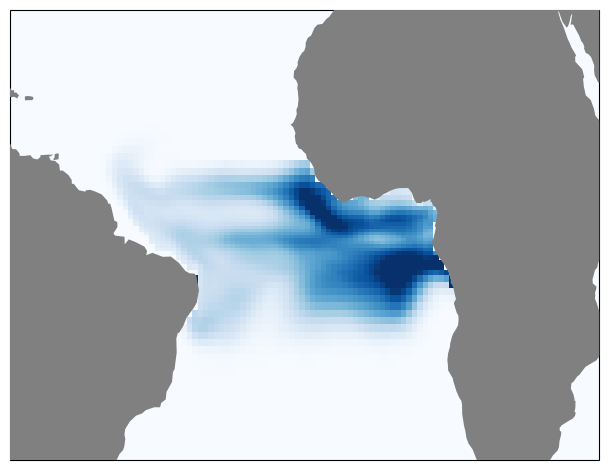

In [45]:
plt.clf()
ax = plt.axes(projection = projection)
vmax = 0.5
it = 0
for i in [7,8,9,10,11,12,1,0]:
    plt.pcolormesh(grid.XC[i],grid.YC[i],trc[it,:,i].sum(axis = 0),transform = ccrs.PlateCarree(),vmax = vmax,vmin = 0,cmap = cmap)

ax.set_extent(extent,crs = projection)
ax.add_feature(cfeature.LAND,facecolor ='grey',zorder = 10)
# ax.set_xlim(-70,30)
# ax.set_ylim(-30,30)
plt.tight_layout()
ax.set_aspect(1.4)
# plt.colorbar()
plt.show()